In [ ]:
#loading the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [ ]:
#loading the data
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [ ]:
#Data
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
print('The Training data has {} rows and {} columns'.format(train.shape[0],train.shape[1]))

The Training data has 1460 rows and 81 columns


In [ ]:
print('The Test data has {} rows and {} columns'.format(test.shape[0],test.shape[1]))

The Test data has 1459 rows and 80 columns


In [ ]:
#checking the data set information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#checking for missing values
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [ ]:
#finding the missing value counts in each of these colunns
miss = train.isnull().sum()/len(train)
miss = miss[miss>0]
miss.sort_values(inplace=True)
miss

,0
Electrical,0.000685
MasVnrArea,0.005479
BsmtQual,0.025342
BsmtCond,0.025342
BsmtFinType1,0.025342
BsmtExposure,0.026027
BsmtFinType2,0.026027
GarageCond,0.055479
GarageQual,0.055479
GarageFinish,0.055479


In [ ]:
'''import matplotlib.pyplot as plt
import seaborn as sns
# Plot the missing value count
#sns.set_color_codes(palette='pastel')
sns.set_palette('pastel', n_colors=7, desat=None, color_codes=True) # Define the palette here
sns.barplot(x='Name', y='count', data=miss)
plt.title('Missing Value Count')
plt.xticks(rotation=90)
plt.show()'''

"import matplotlib.pyplot as plt\nimport seaborn as sns\n# Plot the missing value count\n#sns.set_color_codes(palette='pastel')\nsns.set_palette('pastel', n_colors=7, desat=None, color_codes=True) # Define the palette here\nsns.barplot(x='Name', y='count', data=miss) \nplt.title('Missing Value Count')\nplt.xticks(rotation=90)\nplt.show()"

<ipython-input-8-413b96bc9f14>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

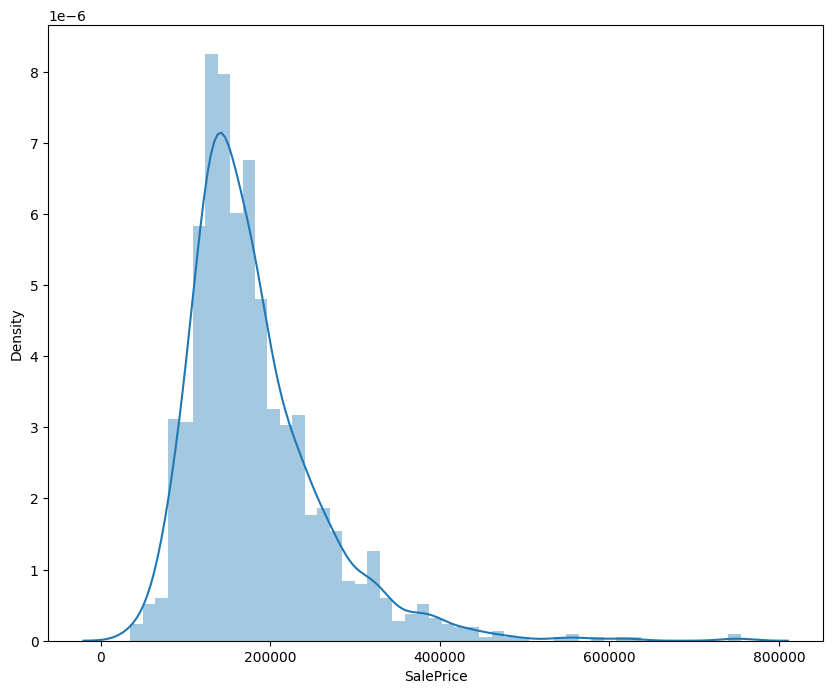

In [ ]:
#Sales Price visualization
sns.distplot(train['SalePrice'])

In [ ]:
#Checking the skewness
print("Skewness of the Sales Price: %f" % train['SalePrice'].skew())

Skewness of the Sales Price: 1.882876


Skewness of the Sales Price: 0.121335


<ipython-input-10-fd307a1694b0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target)


<Axes: xlabel='SalePrice', ylabel='Density'>

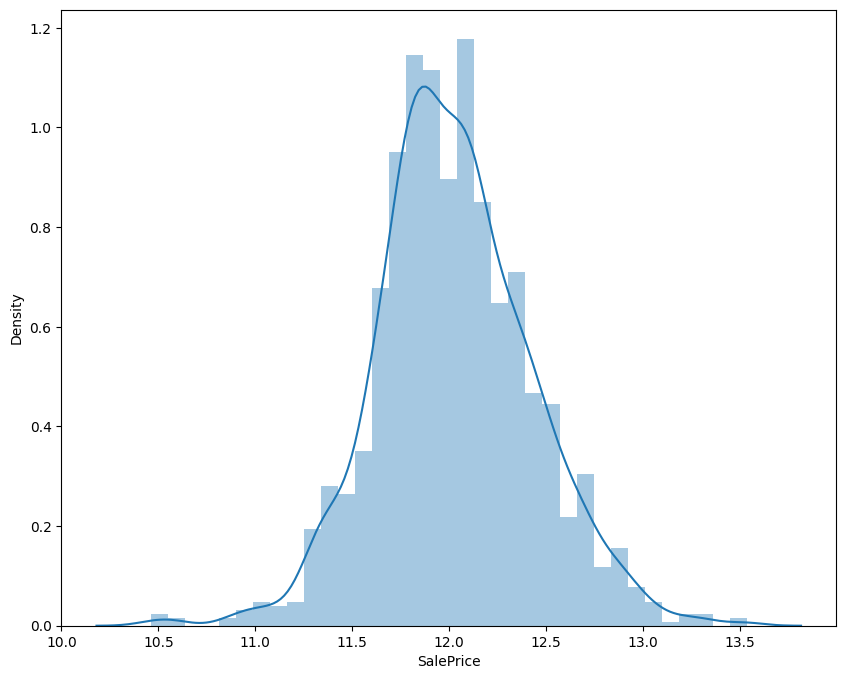

In [ ]:
#Since the target variable has right-skewed distribution, lets log transform this variable and see if this varaible distribution can get closer to the normal
target = np.log(train['SalePrice'])
print("Skewness of the Sales Price: %f" % target.skew())
sns.distplot(target)

In [ ]:
#Separating the variable into new data frames
numeric_features = train.select_dtypes(include=[np.number])
categorical_features = train.select_dtypes(exclude=[np.number])
print('There are {} numeric and {} categorical columns in train data'.format(numeric_features.shape[1],categorical_features.shape[1]))

There are 38 numeric and 43 categorical columns in train data


In [ ]:
del numeric_features['Id']

<Axes: >

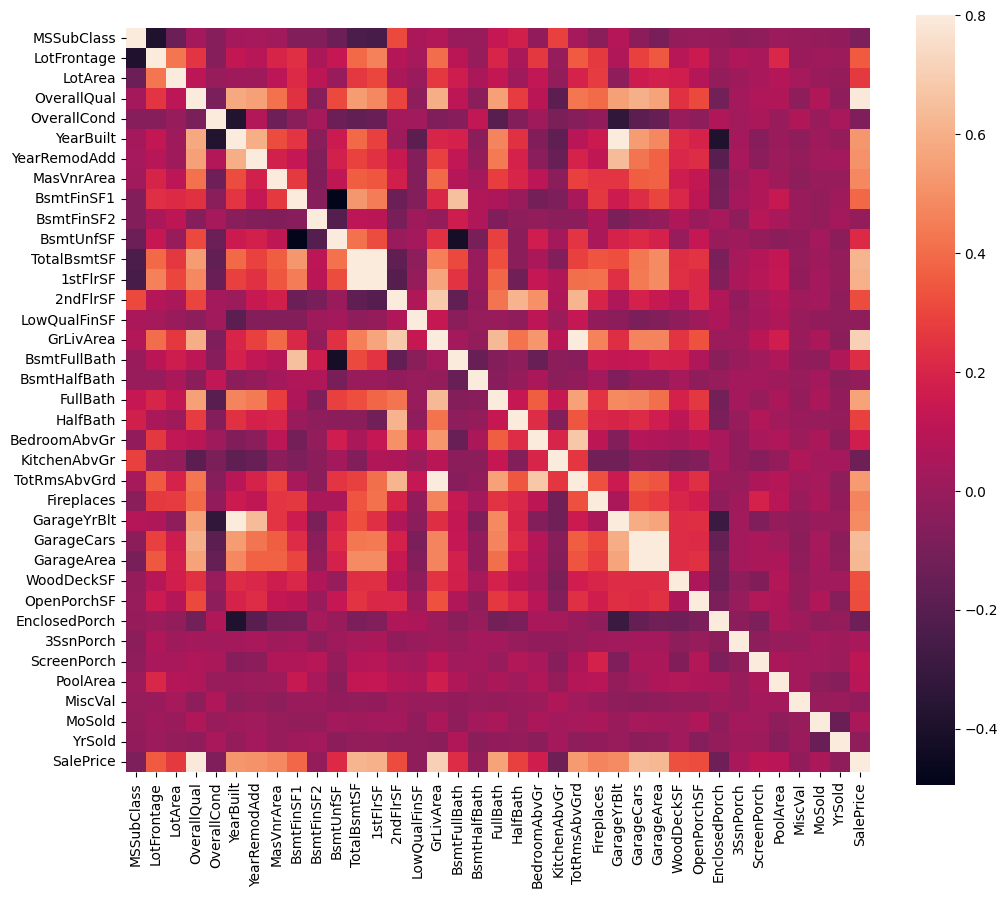

In [ ]:
#Correlation behaviour of numerical varaibles
#Correlation plot
corr = numeric_features.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr, vmax=0.8, square=True)


In [ ]:
#Top 10 values
print(corr['SalePrice'].sort_values(ascending=False)[:10], '\n')
print('-----------------------------------------------------')
#Bottom 5 values
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64 

-----------------------------------------------------
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [ ]:
#Checking the OverallQual variable in detail
train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [ ]:
pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
pivot.sort_values(by='SalePrice', ascending=True)

<ipython-input-17-ec792334bcab>:1: FutureWarning: The provided callable <function median at 0x7e5a9af47400> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)


,SalePrice
OverallQual,
1,50150.0
2,60000.0
3,86250.0
4,108000.0
5,133000.0
6,160000.0
7,200141.0
8,269750.0
9,345000.0


<Axes: xlabel='OverallQual'>

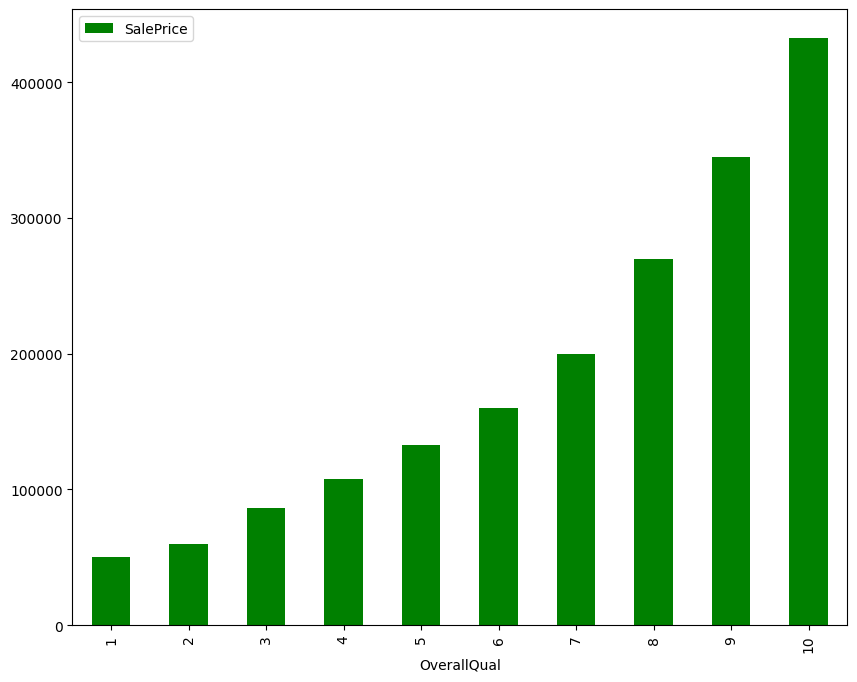

In [ ]:
#Undersating the median behaviour using a bar graph
pivot.plot(kind='bar',color='green')

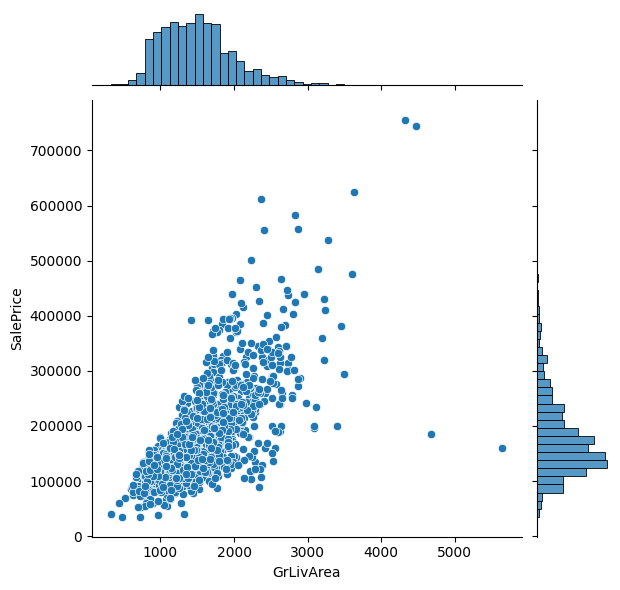

In [ ]:
# Visualizing the next correlated variable GrLivArea and understand its behaviour
sns.jointplot(x='GrLivArea', y='SalePrice', data=train)

In [ ]:
categorical_features.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [ ]:
# Checking the median sale price of a house based on its SaleCondition
sv_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
sv_pivot

<ipython-input-21-94e2d0c801f2>:2: FutureWarning: The provided callable <function median at 0x7e5a9af47400> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  sv_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)


,SalePrice
SaleCondition,
Abnorml,130000.0
AdjLand,104000.0
Alloca,148145.0
Family,140500.0
Normal,160000.0
Partial,244600.0


<Axes: xlabel='SaleCondition'>

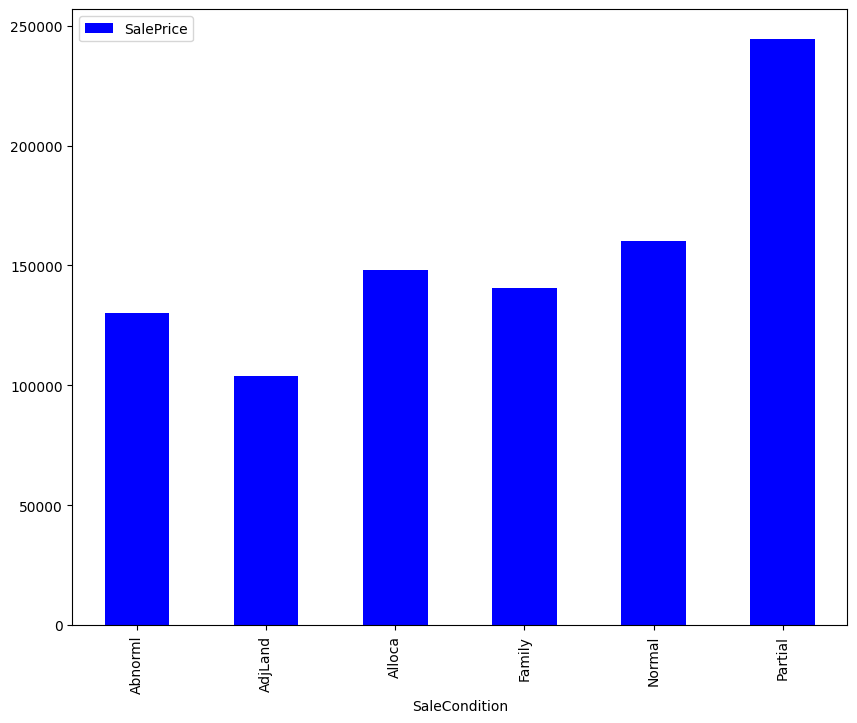

In [ ]:
sv_pivot.plot(kind='bar', color='blue')

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

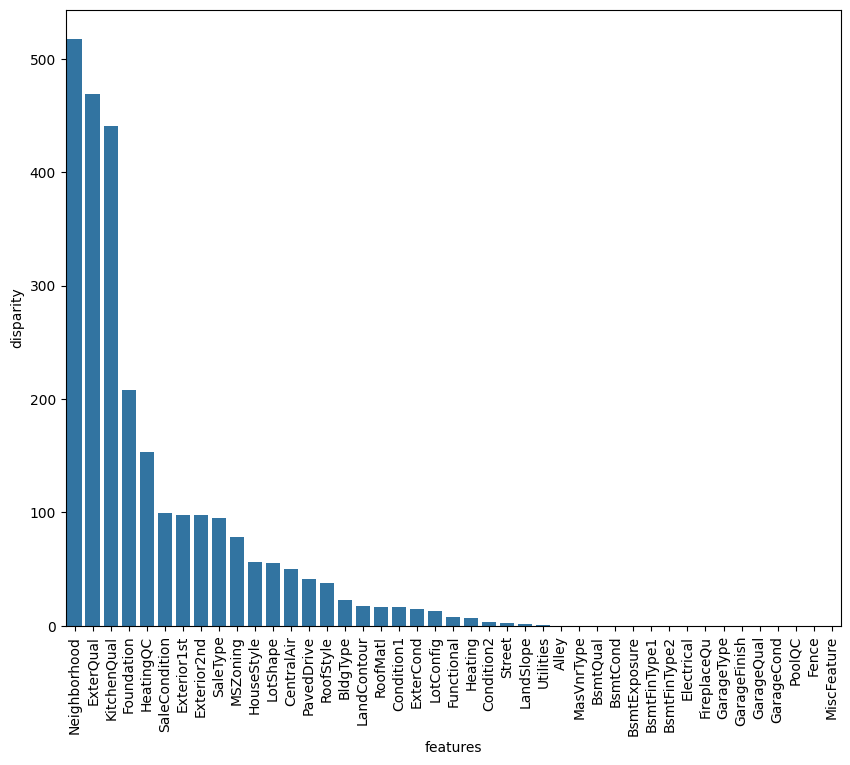

In [ ]:
#Using Anova test to understand correlation between categorical variables and SalePrice
cat = [f for f in train.columns if train.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['SalePrice'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

categorical_features['SalePrice'] = train.SalePrice.values
k = anova(categorical_features)
k['disparity'] = np.log(1./k['pval'].values)
sns.barplot(data=k, x = 'features', y='disparity')
plt.xticks(rotation=90)
plt

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

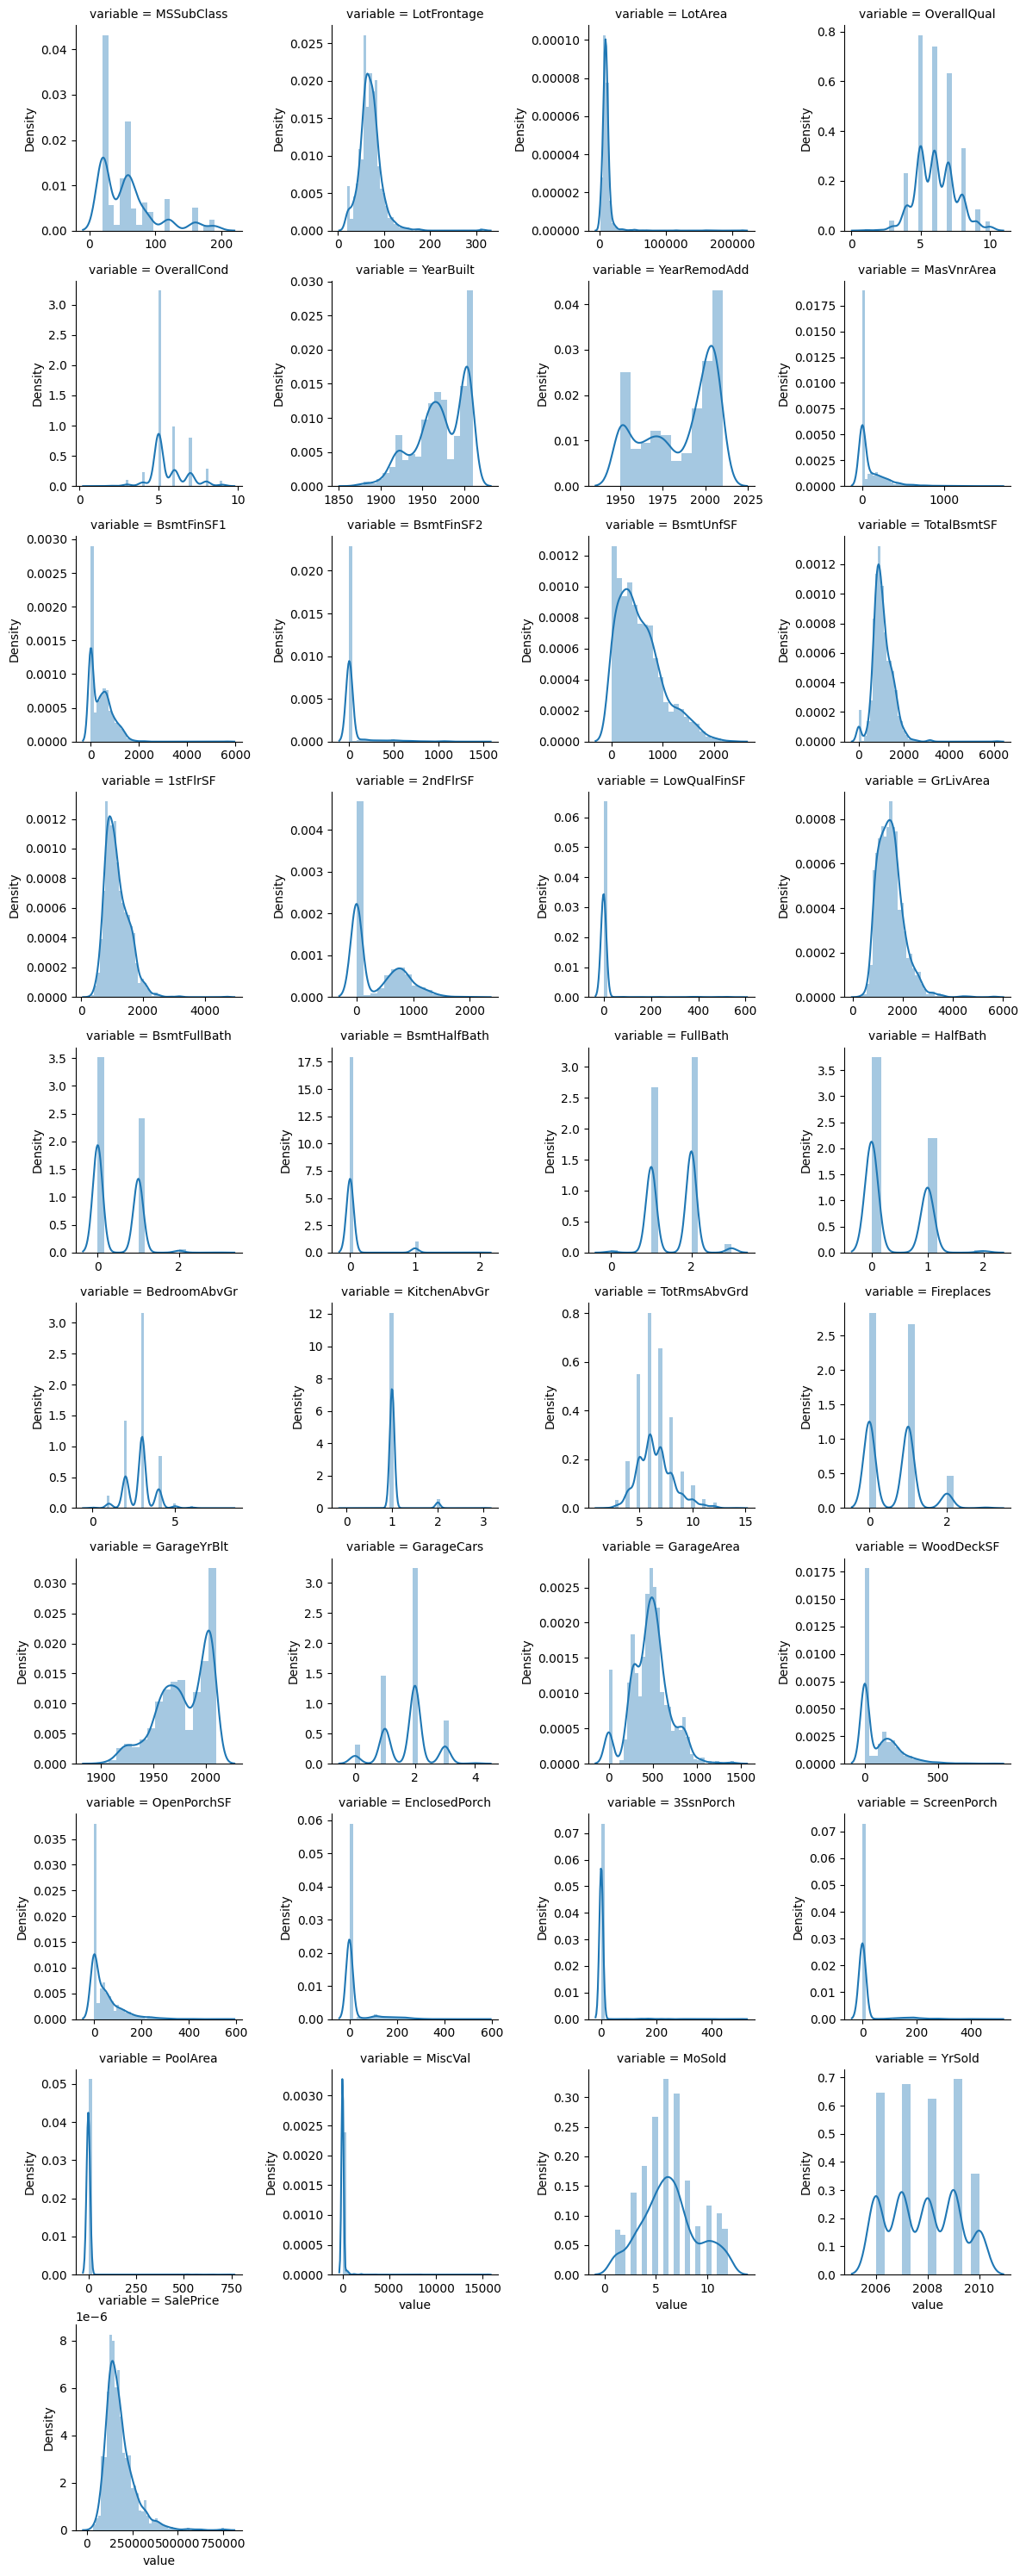

In [ ]:
# Creating numeric plots
num = [f for f in train.columns if train.dtypes[f] != 'object']
num.remove('Id')
nd = pd.melt(train, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

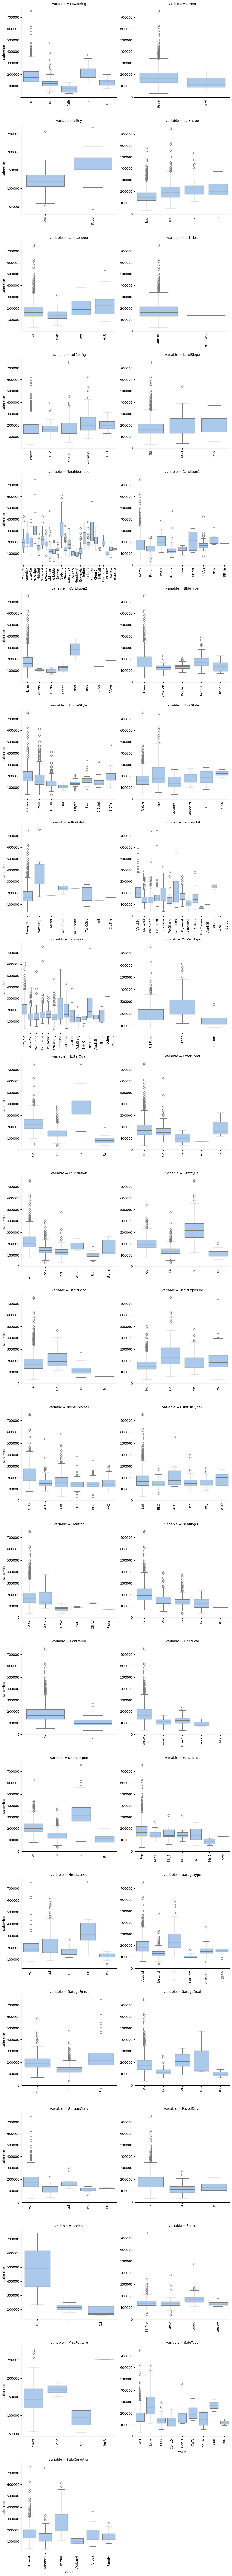

In [ ]:
#Creating boxplots for visualizing categorical values
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat = [f for f in train.columns if train.dtypes[f] == 'object']

p = pd.melt(train, id_vars='SalePrice', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, 'value','SalePrice')
g

In [ ]:
#Data Pre-Processing

In [ ]:
#Removing Outliers
train.drop(train[(train['GrLivArea']>4000)].index, inplace=True)
train.shape

(1456, 81)

In [ ]:
#In row 666, in the test data, it was found that information in variables related to 'Garage' (GarageQual, GarageCond, GarageFinish, GarageYrBlt) is missing. Let's impute them using the mode of these respective variables.
test.loc[666, 'GarageQual'] = 'TA'
test.loc[666, 'GarageCond'] = 'TA'
test.loc[666, 'GarageFinish'] = 'Unf'
test.loc[666, 'GarageYrBlt'] = 1980

In [ ]:
# In row 1116, in test data, all garage variables are NA except GarageType. Let's mark it NA as well.
test.loc[1116, 'GarageType'] = np.nan

In [ ]:
#Encoding all the categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def factorize(data, var, fill_na = None):
      if fill_na is not None:
            data[var].fillna(fill_na, inplace=True)
      le.fit(data[var])
      data[var] = le.transform(data[var])
      return data

In [ ]:
# Combining the train and test data so that we can modify both the data sets at once to save time.
all_data = pd.concat([train, test])
all_data.shape

(2915, 81)

In [ ]:
#Imputing the LotFrontage variable
lot_frontage_by_neighborhood = train['LotFrontage'].groupby(train['Neighborhood'])

for key, group in lot_frontage_by_neighborhood:
                idx = (all_data['Neighborhood'] == key) & (all_data['LotFrontage'].isnull())
                all_data.loc[idx, 'LotFrontage'] = group.median()

In [ ]:
# Imputing the numerical missing values with zero
all_data["MasVnrArea"].fillna(0, inplace=True)
all_data["BsmtFinSF1"].fillna(0, inplace=True)
all_data["BsmtFinSF2"].fillna(0, inplace=True)
all_data["BsmtUnfSF"].fillna(0, inplace=True)
all_data["TotalBsmtSF"].fillna(0, inplace=True)
all_data["GarageArea"].fillna(0, inplace=True)
all_data["BsmtFullBath"].fillna(0, inplace=True)
all_data["BsmtHalfBath"].fillna(0, inplace=True)
all_data["GarageCars"].fillna(0, inplace=True)
all_data["GarageYrBlt"].fillna(0.0, inplace=True)
all_data["PoolArea"].fillna(0, inplace=True)

In [ ]:
# Variable names which have 'quality' or 'qual' in their names can be treated as ordinal variables, as mentioned above. Now, we'll convert the categorical variables into ordinal variables. To do this, lets simply create a dictionary of key-value pairs and map it to the variable in the data set.
qual_dict = {np.nan: 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
name = np.array(['ExterQual','PoolQC' ,'ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu', 'GarageQual','GarageCond'])

for i in name:
     all_data[i] = all_data[i].map(qual_dict).fillna(0).astype(int)

all_data["BsmtExposure"] = all_data["BsmtExposure"].map({np.nan: 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}).fillna(0).astype(int)

bsmt_fin_dict = {np.nan: 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
all_data["BsmtFinType1"] = all_data["BsmtFinType1"].map(bsmt_fin_dict).fillna(0).astype(int)
all_data["BsmtFinType2"] = all_data["BsmtFinType2"].map(bsmt_fin_dict).fillna(0).astype(int)
all_data["Functional"] = all_data["Functional"].map({np.nan: 0, "Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8}).fillna(0).astype(int)

all_data["GarageFinish"] = all_data["GarageFinish"].map({np.nan: 0, "Unf": 1, "RFn": 2, "Fin": 3}).fillna(0).astype(int)
all_data["Fence"] = all_data["Fence"].map({np.nan: 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, "GdPrv": 4}).fillna(0).astype(int)

#encoding data
all_data["CentralAir"] = (all_data["CentralAir"] == "Y") * 1.0
varst = np.array(['MSSubClass','LotConfig','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','Foundation','SaleCondition'])

for x in varst:
         factorize(all_data, x)

#encode variables and impute missing values
all_data = factorize(all_data, "MSZoning", "RL")
all_data = factorize(all_data, "Exterior1st", "Other")
all_data = factorize(all_data, "Exterior2nd", "Other")
all_data = factorize(all_data, "MasVnrType", "None")
all_data = factorize(all_data, "SaleType", "Oth")

In [ ]:
#Feature Engineering

In [ ]:
#creating new variable (1 or 0) based on irregular count levels
#The level with highest count is kept as 1 and rest as 0
all_data["IsRegularLotShape"] = (all_data["LotShape"] == "Reg") * 1
all_data["IsLandLevel"] = (all_data["LandContour"] == "Lvl") * 1
all_data["IsLandSlopeGentle"] = (all_data["LandSlope"] == "Gtl") * 1
all_data["IsElectricalSBrkr"] = (all_data["Electrical"] == "SBrkr") * 1
all_data["IsGarageDetached"] = (all_data["GarageType"] == "Detchd") * 1
all_data["IsPavedDrive"] = (all_data["PavedDrive"] == "Y") * 1
all_data["HasShed"] = (all_data["MiscFeature"] == "Shed") * 1
all_data["Remodeled"] = (all_data["YearRemodAdd"] != all_data["YearBuilt"]) * 1

#Did the modeling happen during the sale year?
all_data["RecentRemodel"] = (all_data["YearRemodAdd"] == all_data["YrSold"]) * 1

# Was this house sold in the year it was built?
all_data["VeryNewHouse"] = (all_data["YearBuilt"] == all_data["YrSold"]) * 1
all_data["Has2ndFloor"] = (all_data["2ndFlrSF"] == 0) * 1
all_data["HasMasVnr"] = (all_data["MasVnrArea"] == 0) * 1
all_data["HasWoodDeck"] = (all_data["WoodDeckSF"] == 0) * 1
all_data["HasOpenPorch"] = (all_data["OpenPorchSF"] == 0) * 1
all_data["HasEnclosedPorch"] = (all_data["EnclosedPorch"] == 0) * 1
all_data["Has3SsnPorch"] = (all_data["3SsnPorch"] == 0) * 1
all_data["HasScreenPorch"] = (all_data["ScreenPorch"] == 0) * 1

#setting levels with high count as 1 and the rest as 0
#you can check for them using the value_counts function
all_data["HighSeason"] = all_data["MoSold"].replace({1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0})
all_data["NewerDwelling"] = all_data["MSSubClass"].replace({20: 1, 30: 0, 40: 0, 45: 0,50: 0, 60: 1, 70: 0, 75: 0, 80: 0, 85: 0,90: 0, 120: 1, 150: 0, 160: 0, 180: 0, 190: 0})

In [ ]:
all_data.shape

(2915, 100)

In [ ]:
#create alldata2
alldata2 = pd.concat([train, test])

all_data["SaleCondition_PriceDown"] = alldata2.SaleCondition.replace({'Abnorml': 1, 'Alloca': 1, 'AdjLand': 1, 'Family': 1, 'Normal': 0, 'Partial': 0})

# house completed before sale or not
all_data["BoughtOffPlan"] = alldata2.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1})
all_data["BadHeating"] = alldata2.HeatingQC.replace({'Ex': 0, 'Gd': 0, 'TA': 0, 'Fa': 1, 'Po': 1})

<Axes: xlabel='Neighborhood'>

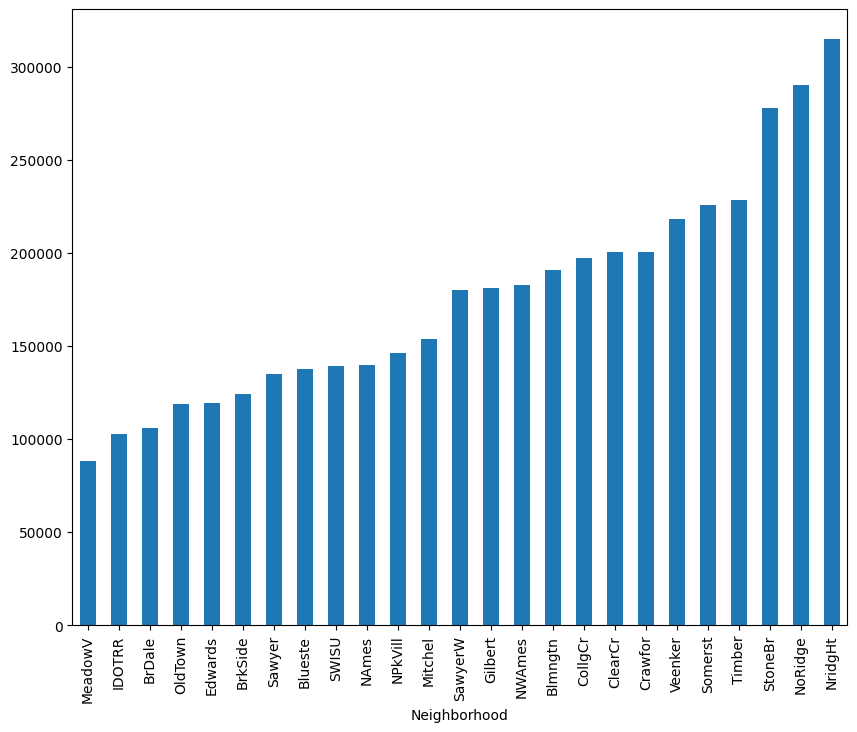

In [ ]:
#calculating total area using all area columns
area_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'LowQualFinSF', 'PoolArea' ]

all_data["TotalArea"] = all_data[area_cols].sum(axis=1)
all_data["TotalArea1st2nd"] = all_data["1stFlrSF"] + all_data["2ndFlrSF"]
all_data["Age"] = 2010 - all_data["YearBuilt"]
all_data["TimeSinceSold"] = 2010 - all_data["YrSold"]
all_data["SeasonSold"] = all_data["MoSold"].map({12:0, 1:0, 2:0, 3:1, 4:1, 5:1, 6:2, 7:2, 8:2, 9:3, 10:3, 11:3}).astype(int)
all_data["YearsSinceRemodel"] = all_data["YrSold"] - all_data["YearRemodAdd"]

# Simplifications of existing features into bad/average/good based on counts
all_data["SimplOverallQual"] = all_data.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
all_data["SimplOverallCond"] = all_data.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
all_data["SimplPoolQC"] = all_data.PoolQC.replace({1 : 1, 2 : 1, 3 : 2, 4 : 2})
all_data["SimplGarageCond"] = all_data.GarageCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
all_data["SimplGarageQual"] = all_data.GarageQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
all_data["SimplFireplaceQu"] = all_data.FireplaceQu.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
all_data["SimplFireplaceQu"] = all_data.FireplaceQu.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
all_data["SimplFunctional"] = all_data.Functional.replace({1 : 1, 2 : 1, 3 : 2, 4 : 2, 5 : 3, 6 : 3, 7 : 3, 8 : 4})
all_data["SimplKitchenQual"] = all_data.KitchenQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
all_data["SimplHeatingQC"] = all_data.HeatingQC.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
all_data["SimplBsmtFinType1"] = all_data.BsmtFinType1.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
all_data["SimplBsmtFinType2"] = all_data.BsmtFinType2.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
all_data["SimplBsmtCond"] = all_data.BsmtCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
all_data["SimplBsmtQual"] = all_data.BsmtQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
all_data["SimplExterCond"] = all_data.ExterCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
all_data["SimplExterQual"] = all_data.ExterQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})

#grouping neighborhood variable based on this plot
train['SalePrice'].groupby(train['Neighborhood']).median().sort_values().plot(kind='bar')

In [ ]:
neighborhood_map = {"MeadowV" : 0, "IDOTRR" : 1, "BrDale" : 1, "OldTown" : 1, "Edwards" : 1, "BrkSide" : 1, "Sawyer" : 1, "Blueste" : 1, "SWISU" : 2, "NAmes" : 2, "NPkVill" : 2, "Mitchel" : 2, "SawyerW" : 2, "Gilbert" : 2, "NWAmes" : 2, "Blmngtn" : 2, "CollgCr" : 2, "ClearCr" : 3, "Crawfor" : 3, "Veenker" : 3, "Somerst" : 3, "Timber" : 3, "StoneBr" : 4, "NoRidge" : 4, "NridgHt" : 4}

all_data['NeighborhoodBin'] = alldata2['Neighborhood'].map(neighborhood_map)
all_data.loc[alldata2.Neighborhood == 'NridgHt', "Neighborhood_Good"] = 1
all_data.loc[alldata2.Neighborhood == 'Crawfor', "Neighborhood_Good"] = 1
all_data.loc[alldata2.Neighborhood == 'StoneBr', "Neighborhood_Good"] = 1
all_data.loc[alldata2.Neighborhood == 'Somerst', "Neighborhood_Good"] = 1
all_data.loc[alldata2.Neighborhood == 'NoRidge', "Neighborhood_Good"] = 1
all_data["Neighborhood_Good"].fillna(0, inplace=True)
all_data["SaleCondition_PriceDown"] = alldata2.SaleCondition.replace({'Abnorml': 1, 'Alloca': 1, 'AdjLand': 1, 'Family': 1, 'Normal': 0, 'Partial': 0})

# House completed before sale or not
all_data["BoughtOffPlan"] = alldata2.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1})
all_data["BadHeating"] = alldata2.HeatingQC.replace({'Ex': 0, 'Gd': 0, 'TA': 0, 'Fa': 1, 'Po': 1})
all_data.shape

<ipython-input-48-ceb44c0d9587>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data['NeighborhoodBin'] = alldata2['Neighborhood'].map(neighborhood_map)
<ipython-input-48-ceb44c0d9587>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data.loc[alldata2.Neighborhood == 'NridgHt', "Neighborhood_Good"] = 1


(2915, 126)

In [ ]:
#Creating new data
train_new = all_data[all_data['SalePrice'].notnull()]
test_new = all_data[all_data['SalePrice'].isnull()]

print("train", train_new.shape)
print ('----------------')
print("test", test_new.shape)

train (1456, 126)
----------------
test (1459, 126)


In [ ]:
#Transforming new features and remove their skewness
#get numeric features
numeric_features = [f for f in train_new.columns if train_new[f].dtype != object]

#transform the numeric features using log(x + 1)
from scipy.stats import skew
skewed = train_new[numeric_features].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
train_new[skewed] = np.log1p(train_new[skewed])
test_new[skewed] = np.log1p(test_new[skewed])
del test_new['SalePrice']

<ipython-input-52-e53e7fd0c344>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_new[skewed] = np.log1p(train_new[skewed])
<ipython-input-52-e53e7fd0c344>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_new[skewed] = np.log1p(test_new[skewed])


In [ ]:
#Standardizing the numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_new[numeric_features])
scaled = scaler.transform(train_new[numeric_features])

for i, col in enumerate(numeric_features):
       train_new[col] = scaled[:,i]

numeric_features.remove('SalePrice')
scaled = scaler.fit_transform(test_new[numeric_features])

for i, col in enumerate(numeric_features):
      test_new[col] = scaled[:,i]

<ipython-input-53-4ef4eb56bb67>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_new[col] = scaled[:,i]
<ipython-input-53-4ef4eb56bb67>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_new[col] = scaled[:,i]


In [ ]:
#One hot encoding the categorical variable
def onehot(onehot_df, df, column_name, fill_na):
       onehot_df[column_name] = df[column_name]
       if fill_na is not None:
            onehot_df[column_name].fillna(fill_na, inplace=True)

       dummies = pd.get_dummies(onehot_df[column_name], prefix="_"+column_name)
       onehot_df = onehot_df.join(dummies)
       onehot_df = onehot_df.drop([column_name], axis=1)
       return onehot_df

def munge_onehot(df):
       onehot_df = pd.DataFrame(index = df.index)

       onehot_df = onehot(onehot_df, df, "MSSubClass", None)
       onehot_df = onehot(onehot_df, df, "MSZoning", "RL")
       onehot_df = onehot(onehot_df, df, "LotConfig", None)
       onehot_df = onehot(onehot_df, df, "Neighborhood", None)
       onehot_df = onehot(onehot_df, df, "Condition1", None)
       onehot_df = onehot(onehot_df, df, "BldgType", None)
       onehot_df = onehot(onehot_df, df, "HouseStyle", None)
       onehot_df = onehot(onehot_df, df, "RoofStyle", None)
       onehot_df = onehot(onehot_df, df, "Exterior1st", "VinylSd")
       onehot_df = onehot(onehot_df, df, "Exterior2nd", "VinylSd")
       onehot_df = onehot(onehot_df, df, "Foundation", None)
       onehot_df = onehot(onehot_df, df, "SaleType", "WD")
       onehot_df = onehot(onehot_df, df, "SaleCondition", "Normal")

       #Fill in missing MasVnrType for rows that do have a MasVnrArea.
       temp_df = df[["MasVnrType", "MasVnrArea"]].copy()
       idx = (df["MasVnrArea"] != 0) & ((df["MasVnrType"] == "None") | (df["MasVnrType"].isnull()))
       temp_df.loc[idx, "MasVnrType"] = "BrkFace"
       onehot_df = onehot(onehot_df, temp_df, "MasVnrType", "None")

       onehot_df = onehot(onehot_df, df, "LotShape", None)
       onehot_df = onehot(onehot_df, df, "LandContour", None)
       onehot_df = onehot(onehot_df, df, "LandSlope", None)
       onehot_df = onehot(onehot_df, df, "Electrical", "SBrkr")
       onehot_df = onehot(onehot_df, df, "GarageType", "None")
       onehot_df = onehot(onehot_df, df, "PavedDrive", None)
       onehot_df = onehot(onehot_df, df, "MiscFeature", "None")
       onehot_df = onehot(onehot_df, df, "Street", None)
       onehot_df = onehot(onehot_df, df, "Alley", "None")
       onehot_df = onehot(onehot_df, df, "Condition2", None)
       onehot_df = onehot(onehot_df, df, "RoofMatl", None)
       onehot_df = onehot(onehot_df, df, "Heating", None)

       # we'll have these as numerical variables too
       onehot_df = onehot(onehot_df, df, "ExterQual", "None")
       onehot_df = onehot(onehot_df, df, "ExterCond", "None")
       onehot_df = onehot(onehot_df, df, "BsmtQual", "None")
       onehot_df = onehot(onehot_df, df, "BsmtCond", "None")
       onehot_df = onehot(onehot_df, df, "HeatingQC", "None")
       onehot_df = onehot(onehot_df, df, "KitchenQual", "TA")
       onehot_df = onehot(onehot_df, df, "FireplaceQu", "None")
       onehot_df = onehot(onehot_df, df, "GarageQual", "None")
       onehot_df = onehot(onehot_df, df, "GarageCond", "None")
       onehot_df = onehot(onehot_df, df, "PoolQC", "None")
       onehot_df = onehot(onehot_df, df, "BsmtExposure", "None")
       onehot_df = onehot(onehot_df, df, "BsmtFinType1", "None")
       onehot_df = onehot(onehot_df, df, "BsmtFinType2", "None")
       onehot_df = onehot(onehot_df, df, "Functional", "Typ")
       onehot_df = onehot(onehot_df, df, "GarageFinish", "None")
       onehot_df = onehot(onehot_df, df, "Fence", "None")
       onehot_df = onehot(onehot_df, df, "MoSold", None)

       # Divide  the years between 1871 and 2010 into slices of 20 years
       year_map = pd.concat(pd.Series("YearBin" + str(i+1), index=range(1871+i*20,1891+i*20))  for i in range(0, 7))
       yearbin_df = pd.DataFrame(index = df.index)
       yearbin_df["GarageYrBltBin"] = df.GarageYrBlt.map(year_map)
       yearbin_df["GarageYrBltBin"].fillna("NoGarage", inplace=True)
       yearbin_df["YearBuiltBin"] = df.YearBuilt.map(year_map)
       yearbin_df["YearRemodAddBin"] = df.YearRemodAdd.map(year_map)

       onehot_df = onehot(onehot_df, yearbin_df, "GarageYrBltBin", None)
       onehot_df = onehot(onehot_df, yearbin_df, "YearBuiltBin", None)
       onehot_df = onehot(onehot_df, yearbin_df, "YearRemodAddBin", None)
       return onehot_df

#create one-hot features
onehot_df = munge_onehot(train)

neighborhood_train = pd.DataFrame(index=train_new.shape)
neighborhood_train['NeighborhoodBin'] = train_new['NeighborhoodBin']
neighborhood_test = pd.DataFrame(index=test_new.shape)
neighborhood_test['NeighborhoodBin'] = test_new['NeighborhoodBin']

onehot_df = onehot(onehot_df, neighborhood_train, 'NeighborhoodBin', None)

In [ ]:
# Adding the One hot variables in to our train data set
train_new = train_new.join(onehot_df)
train_new.shape

(1456, 433)

In [ ]:
#adding one hot features to test
onehot_df_te = munge_onehot(test)
onehot_df_te = onehot(onehot_df_te, neighborhood_test, "NeighborhoodBin", None)
test_new = test_new.join(onehot_df_te)
test_new.shape

(1459, 417)

In [ ]:
#dropping some columns from the train data as they are not found in test
drop_cols = ["_Exterior1st_ImStucc", "_Exterior1st_Stone","_Exterior2nd_Other","_HouseStyle_2.5Fin","_RoofMatl_Membran", "_RoofMatl_Metal", "_RoofMatl_Roll", "_Condition2_RRAe", "_Condition2_RRAn", "_Condition2_RRNn", "_Heating_Floor", "_Heating_OthW", "_Electrical_Mix", "_MiscFeature_TenC", "_GarageQual_Ex",  "_PoolQC_Fa"]
train_new.drop(drop_cols, axis=1, inplace=True)
train_new.shape

(1456, 417)

In [ ]:
#removing one column missing from train data
test_new.drop(["_MSSubClass_150"], axis=1, inplace=True)

# Drop these columns
drop_cols = ["_Condition2_PosN", # only two are not zero
         "_MSZoning_C (all)",
         "_MSSubClass_160"]

train_new.drop(drop_cols, axis=1, inplace=True)
test_new.drop(drop_cols, axis=1, inplace=True)

In [ ]:
#Transforming the target variable and store it in a new array
#create a label set
label_df = pd.DataFrame(index = train_new.index, columns = ['SalePrice'])
label_df['SalePrice'] = np.log(train['SalePrice'])
print("Training set size:", train_new.shape)
print("Test set size:", test_new.shape)

Training set size: (1456, 414)
Test set size: (1459, 413)


In [ ]:
#Model Trainning and Evaluation
import xgboost as xgb
# Convert object columns to numerical using one-hot encoding or other suitable methods
train_new = pd.get_dummies(train_new)
test_new = pd.get_dummies(test_new) # Apply to test set as well for consistency

# Align columns between train and test sets
train_new, test_new = train_new.align(test_new, join='inner', axis=1)

regr = xgb.XGBRegressor(colsample_bytree=0.2,
                       gamma=0.0,
                       learning_rate=0.05,
                       max_depth=6,
                       min_child_weight=1.5,
                       n_estimators=7200,
                       reg_alpha=0.9,
                       reg_lambda=0.6,
                       subsample=0.2,
                       seed=42,
                       silent=1)

regr.fit(train_new, label_df)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:57:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.2, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=1.5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=7200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import mean_squared_error
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

# run prediction on training set to get an idea of how well it does
y_pred = regr.predict(train_new)
y_test = label_df
print("XGBoost score on training set: ", rmse(y_test, y_pred))

# make prediction on test set
y_pred_xgb = regr.predict(test_new)



XGBoost score on training set:  0.0382302602662344


In [ ]:
#submit this prediction and get the score
pred1 = pd.DataFrame({'Id': test['Id'], 'SalePrice': np.exp(y_pred_xgb)})
pred1.to_csv('xgbnono.csv', header=True, index=False)

In [ ]:
#With the score, we have achieved a leaderboard position of 3159

In [ ]:
# Training with the Lasso model
from sklearn.linear_model import Lasso

#found this best alpha through cross-validation
best_alpha = 0.00099

regr = Lasso(alpha=best_alpha, max_iter=50000)
regr.fit(train_new, label_df)

# run prediction on the training set to get a rough idea of how well it does
y_pred = regr.predict(train_new)
y_test = label_df
print("Lasso score on training set: ", rmse(y_test, y_pred))

Lasso score on training set:  0.10284467276063235


In [ ]:
#make prediction on the test set
y_pred_lasso = regr.predict(test_new)
lasso_ex = np.exp(y_pred_lasso)
pred1 = pd.DataFrame({'Id': test['Id'], 'SalePrice': lasso_ex})
pred1.to_csv('lasso_model.csv', header=True, index=False)

In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

np.random.seed(10)

#create Model
#define base model
def base_model():
     model = Sequential()
     model.add(Dense(20, input_dim=398, kernel_initializer='normal', activation='relu')) #Use kernel_initializer instead of init
     model.add(Dense(10, kernel_initializer='normal', activation='relu')) #Use kernel_initializer instead of init
     model.add(Dense(1, kernel_initializer='normal')) #Use kernel_initializer instead of init
     model.compile(loss='mean_squared_error', optimizer = 'adam')
     return model

seed = 7
np.random.seed(seed)

scale = StandardScaler()
X_train = scale.fit_transform(train_new)
X_test = scale.fit_transform(test_new)

keras_label = label_df.values.ravel() #Convert label_df to a 1D numpy array
#Build and train the model directly
model = base_model()
model.fit(X_train, keras_label, epochs=1000, batch_size=5, verbose=0)

#make predictions and create the submission file
kpred = model.predict(X_test)
kpred = np.exp(kpred)
pred_df = pd.DataFrame(kpred, index=test["Id"], columns=["SalePrice"])
pred_df.to_csv('keras1.csv', header=True, index_label='Id')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 398, but received input with shape (None, 444)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 444), dtype=float32)
  • training=True
  • mask=None